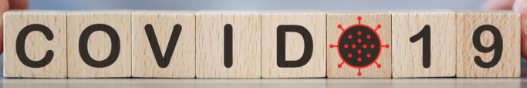

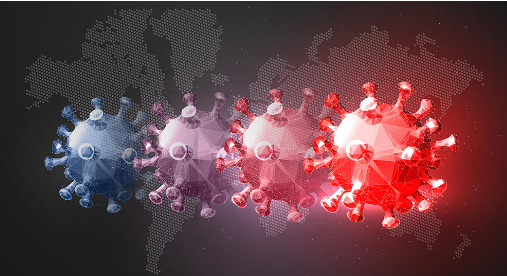

## <font color = black >Analysis objective<font/>
1. Total number of deaths and cases of COVID-19 worldwide 
6. Total number of deaths and cases of COVID-19 in each continent  
4. Top 05 countries with the highest deaths and cases of COVID
6. Bottom 05 countries with the lowest deaths and cases of COVID  
10. Daily cumulative trend of COVID-19 cases and deaths
7. Total number of deaths and cases by country per year/month
100. Annual mortality rate  
101. Monthly infection rate    
102. Monthly average total cases (infection) and total deaths (mortality)  
103. COVID-19 vaccinations trend
    
> _The dataset is made up of COVID-19 records for the years 2020/2021/2022/2023(download date 09/01/2023 = to the last day of records in the dataset)._  
> **_[LINK TO COVID DATASET](https://ourworldindata.org/covid-deaths "Link to DATASET")_**
    


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\pc\Downloads\owid-covid-data (1).csv")
data.head(2)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  

[2 rows x 67 columns]

# <font color = black >PART A (data cleaning)</font>

1. Get familiar with the data set
2. Check the data type of the columns
3. Select the columns useful for analysis
1. Check for null values  
2. Change some cells' value  
100. Cell filling 
3. Deletion of unnecessary and redundant lines  

#### <font color = black >2) Display the table dimensions and columns names</font> 

In [2]:
data.columns
data.shape 
# 24 8856 records and 67 columns

(248856, 67)

#### <font color = black >3) Check the data type of each column</font>

In [3]:
data.dtypes
# the date column type is "object" we must parse it to "date"

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

#### <font color = black >4) Parse the date column into "datetime" column type</font>

In [4]:
data["date"] = pd.to_datetime(data["date"])
data["date"].dtypes

dtype('<M8[ns]')

#### <font color = black >5) Choose our columns</font>


In [5]:
data = data.iloc[::,[0,1,2,3,4,5,7,8,34,35,36,62]]
data.head(2)
#data.dtypes

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   

   total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0           NaN         NaN                 NaN                NaN   
1           NaN         NaN                 NaN                NaN   

   people_fully_vaccinated  population  
0                      NaN  41128772.0  
1                      NaN  41128772.0

* <font color = black >**_observation_**</font>

> For each record, for a location for a **given date** we have **total_cases**, **new_cases**, **total_deaths** _etc_.  

> The columns **total_cases** and **total_deaths** are **_cumulative columns_** so as a day increase we have the **_cumulative sum_**<br>of all the values of the **_previous days_**;  

> **new_deaths**, **new_cases** are **_not cumulative columns_**<br>**Population** is the same value for a country regardless of the day.


#### <font color = black >6) Null values</font>

In [6]:
data.isnull().sum()
# we have columns that contain null cells
# depending on our analysis we will see if we delete them or we fill them

iso_code                        0
continent                   13986
location                        0
date                            0
total_cases                 14148
new_cases                   14477
total_deaths                33657
new_deaths                  33757
total_vaccinations         178534
people_vaccinated          181603
people_fully_vaccinated    184291
population                   1068
dtype: int64

#### <font color = black >7) Null cells in the "continent" column</font>

In [7]:
data[data["continent"].isna()].head(3)

iso_code continent location       date  total_cases  new_cases  \
1051  OWID_AFR       NaN   Africa 2020-02-13          NaN        0.0   
1052  OWID_AFR       NaN   Africa 2020-02-14          1.0        1.0   
1053  OWID_AFR       NaN   Africa 2020-02-15          1.0        0.0   

      total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
1051           NaN         0.0                 NaN                NaN   
1052           NaN         0.0                 NaN                NaN   
1053           NaN         0.0                 NaN                NaN   

      people_fully_vaccinated    population  
1051                      NaN  1.426737e+09  
1052                      NaN  1.426737e+09  
1053                      NaN  1.426737e+09

In [8]:
data["continent"].isna().sum()

13986

In [9]:
data["location"][data["continent"].isna()].value_counts()

Asia                   1084
High income            1084
Lower middle income    1084
North America          1084
Upper middle income    1084
World                  1084
Europe                 1083
European Union         1083
Oceania                1081
International          1068
Africa                 1062
South America          1053
Low income             1052
Name: location, dtype: int64

* <font color = black >**_observation_**</font>

* For all the null cells in the continent column the values in the location column is a group location (not a country):  
    - If we had a country as a corresponding value would have filled the corresponding null cell in the continent column by the <br>country continent, but we do not have that case
    - we will leave the nulls value this way, the null cells are justified

#### <font color = black >8) I want the location column to only contain countries</font>         

In [10]:
data=data[~((data["continent"].isnull()) & (data["location"].isin(["High income","Low income","Lower middle income","Upper middle income","World","International","Asia","North America","South America","Europe","European Union","Oceania","Africa"])))]

#### <font color = black >9) Let's verify that the deletion has been carried out</font> 

In [11]:
data[(data["continent"].isnull()) & (data["location"].isin(["High income","Low income","Lower middle income","Upper middle income","World","International","Asia","North America","South America","Europe","European Union","Oceania","Africa"]))]
#we have no records, we are ok

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_vaccinated, people_fully_vaccinated, population]
Index: []

In [12]:
data.isnull().sum()  # due to the cleaning we did above, continent and location no longer contain null cells

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                 14141
new_cases                   14477
total_deaths                33465
new_deaths                  33744
total_vaccinations         173493
people_vaccinated          176562
people_fully_vaccinated    179070
population                      0
dtype: int64

#### <font color = black >10) Duplicates</font>

In [13]:
data[data.duplicated()] # no duplicates

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_vaccinated, people_fully_vaccinated, population]
Index: []

#### <font color = black >11) Total cases & New_cases, Total deaths & New deaths, People vaccinated & People fully vaccinated</font>

In [14]:
data[ data[ "new_cases"] > data[ "total_cases"]].sort_values("date", ascending = True, na_position = "last", axis = 0)
# we have no records we are good

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_vaccinated, people_fully_vaccinated, population]
Index: []

In [15]:
data[(data[ "new_deaths"] > data[ "total_deaths"])]
# we have no records we are good

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_vaccinated, people_fully_vaccinated, population]
Index: []

In [16]:
data[(data[ "people_fully_vaccinated"] > data[ "people_vaccinated"])]
# we have no records we are good

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_vaccinated, people_fully_vaccinated, population]
Index: []

* <font color = black >**_observation_**</font>

> **_Total cases should be $>$$=$ new_cases_**:<br>The purpose is to verify if this condition is true, if it isn't, try to understand why?

> **_Total deaths should be $>$$=$ new_deaths_**;

> **_People_vaccinated should be $>$$=$ people_fully_vaccinated_**.


#### <font color = black >12) Null values in quantitative columns</font>

In [17]:
data.isnull().sum()

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                 14141
new_cases                   14477
total_deaths                33465
new_deaths                  33744
total_vaccinations         173493
people_vaccinated          176562
people_fully_vaccinated    179070
population                      0
dtype: int64

* <font color = black >**_observation_**</font>

> We have null values in almost all the **_quantitative columns_** except **_population_**

>For the moment we will not fill the cells with any value <br>Depending on the analatycal query, will fill the cells or not...let just keep it in mind


# <font color = black >PART B (Analysis)</font>

> This part consists of answering analytical questions and visualising them

> We should keep in mind that the quantitative columns:**_Total deaths_** and **_Total cases_** have values that are cumulated daily for each location<br>
The **_max value of a quantitative column should actually corresepond to the last day of our dataset for a given location_**<br>
ex .. **_total deaths_** in **_20/09/2020_** should be **_$>$$=$_** to all the **_total deaths_** of the previous days.<br>The columns **_new_deaths_** and **_new_cases_** are not cumulative columns

> For a **_location (country)_** first record of deaths or cases, **_total_cases_** is equal to **_new_cases_**, but as days go by the **_total_cases_** column becomes **_> =_** to the **_new_case_** column 

> **_Total cases_** is a daily cumulated column and **_new_cases_** is a daily not cumulated column both for each location
            

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### <font color = black >13) Total number of deaths and cases of COVID worldwide up to</font> <font color = black>**09/01/2023**</font>

In [19]:
data.groupby("location").max().loc[:,["total_cases","total_deaths"]].sum()

total_cases     664703388.0
total_deaths      6709331.0
dtype: float64

####  <font color = black >14) Total number of deaths and cases of COVID in each continent up to</font> <font color = black>**09/01/2023**</font>

In [20]:
df = data.groupby(["continent","iso_code","location"]).max().loc[:,["total_cases","total_deaths"]]
df.groupby(["continent"]).sum().loc[:,["total_cases","total_deaths"]].sort_values(["total_cases","total_deaths"], axis = 0, ascending = False)

total_cases  total_deaths
continent                               
Europe         245591654.0     2007405.0
Asia           205944055.0     1522037.0
North America  119827464.0     1556673.0
South America   67107304.0     1342857.0
Oceania         13756680.0       22571.0
Africa          12476231.0      257788.0

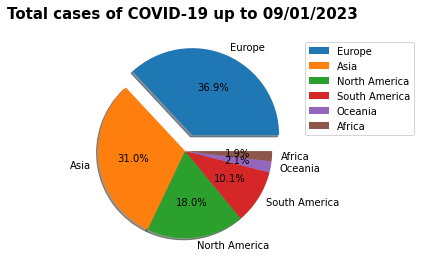

In [21]:
df = df.groupby(["continent"]).sum().loc[:,["total_cases","total_deaths"]].sort_values(["total_cases","total_deaths"], axis = 0, ascending = False).reset_index()

myexplode = [0.2, 0, 0, 0,0,0]
plt.pie(df["total_cases"], labels = df["continent"],autopct='%1.1f%%', explode = myexplode, shadow=True)

plt.title("Total cases of COVID-19 up to 09/01/2023 \n", fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

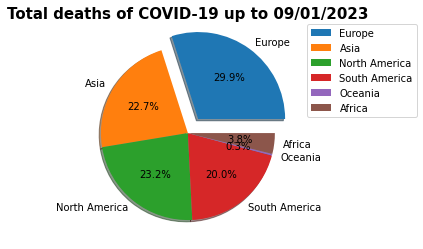

In [22]:
myexplode = [0.2, 0, 0, 0,0,0]
plt.pie(df["total_deaths"], labels = df["continent"], autopct='%1.1f%%',explode = myexplode, shadow=True)

plt.title("Total deaths of COVID-19 up to 09/01/2023",fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### <font color = black >15) Top 05 countries with the highest deaths and cases of COVID up to</font> <font color = black>**_09/01/2023_**</font>

In [23]:
data.groupby("location").max().loc[:,["total_cases","total_deaths"]].sort_values(["total_cases","total_deaths"], axis = 0, ascending = False).head(5)

total_cases  total_deaths
location                                
United States  101285347.0     1096751.0
India           44681439.0      530722.0
France          39449416.0      163059.0
Germany         37540072.0      162975.0
Brazil          36477214.0      694779.0

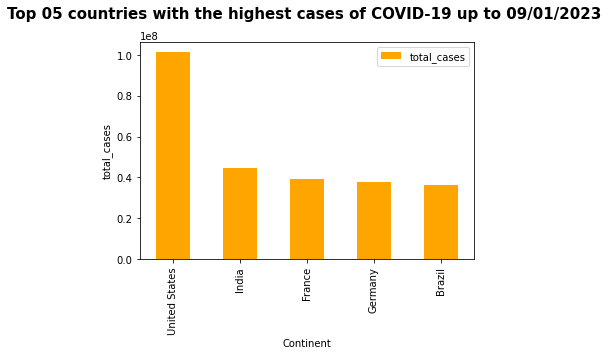

In [24]:
df_country = data.groupby("location").max().loc[:,["total_cases","total_deaths"]].sort_values(["total_cases","total_deaths"], axis = 0, ascending = False).head(5)
df_country.plot(kind="bar",y=["total_cases"], color = "orange")
plt.title("Top 05 countries with the highest cases of COVID-19 up to 09/01/2023 \n", fontsize=15, fontweight="bold")
plt.ylabel("total_cases")
plt.xlabel("Continent")
plt.show()

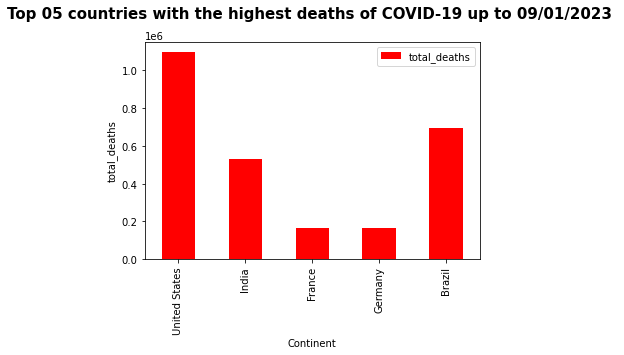

In [25]:
df_country.plot(kind="bar",y=["total_deaths"], color = "red")
plt.title("Top 05 countries with the highest deaths of COVID-19 up to 09/01/2023 \n", fontsize=15, fontweight="bold")
plt.ylabel("total_deaths")
plt.xlabel("Continent")
plt.show()

#### <font color = black >16) Bottom 05 countries with the lowest deaths and cases of COVID up to</font> <font color = black>**_09/01/2023_**</font>

In [26]:
data.groupby("location").max().loc[:,["total_cases","total_deaths"]].sort_values(["total_cases","total_deaths"], axis = 0, ascending = True).head(5)


total_cases  total_deaths
location                                   
North Korea               1.0           6.0
Vatican                  29.0           NaN
Montserrat             1403.0           8.0
Falkland Islands       1930.0           NaN
Saint Helena           2166.0           NaN

#### <font color = black >17) Let us insert the year and month column</font> <font color = black>**_09/01/2023_**</font>

In [27]:
data.insert(3,"month",data["date"].dt.month)
data.insert(4,"year",data["date"].dt.year)
data.head(3)

iso_code continent     location  month  year       date  total_cases  \
0      AFG      Asia  Afghanistan      2  2020 2020-02-24          5.0   
1      AFG      Asia  Afghanistan      2  2020 2020-02-25          5.0   
2      AFG      Asia  Afghanistan      2  2020 2020-02-26          5.0   

   new_cases  total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0        5.0           NaN         NaN                 NaN                NaN   
1        0.0           NaN         NaN                 NaN                NaN   
2        0.0           NaN         NaN                 NaN                NaN   

   people_fully_vaccinated  population  
0                      NaN  41128772.0  
1                      NaN  41128772.0  
2                      NaN  41128772.0

#### <font color = black >18) Daily cumulative trend of COVID-19 cases and deaths up to</font> <font color = black>**_09/01/2023_**</font>

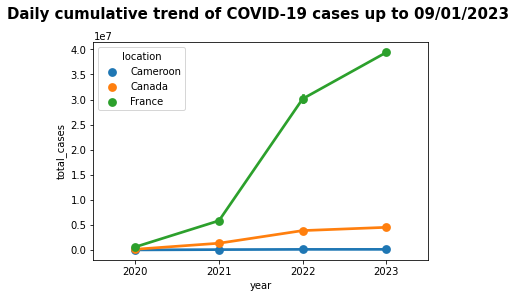

In [28]:
data_cum = data[data["location"].isin(["France","Canada","Cameroon"])]  # I decided to choose only some countries
plt.subplot(111)
sns.pointplot(x='year', y='total_cases', data = data_cum, hue= "location")

plt.title("Daily cumulative trend of COVID-19 cases up to 09/01/2023 \n", fontsize=15, fontweight="bold")
plt.show()

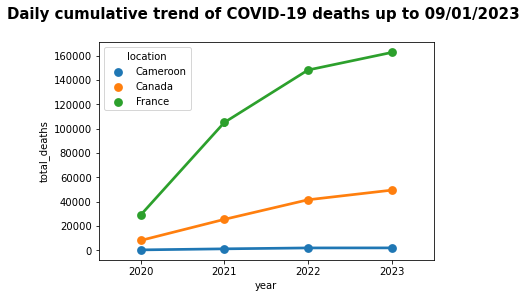

In [29]:
plt.subplot(111)
sns.pointplot(x='year', y='total_deaths', data = data_cum, hue= "location")

plt.title("Daily cumulative trend of COVID-19 deaths up to 09/01/2023 \n", fontsize=15, fontweight="bold")
plt.show()

#### <font color = black > 19) Total number of deaths, total number of cases by country, for each year</font> <font color = black>**_2020/2021/2022/2023_**</font>

In [30]:
dt=data.groupby(["year","location"]).sum().loc[:,["new_cases","new_deaths"]].reset_index()

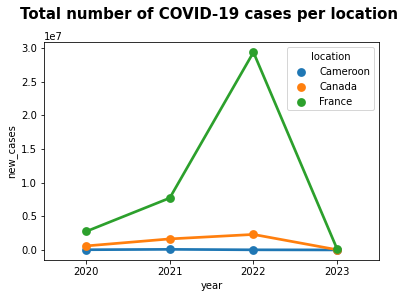

In [31]:
dt_country=dt[dt["location"].isin(["France","Canada","Cameroon"])]

plt.subplot(111)
sns.pointplot(x='year', y='new_cases', data = dt_country, hue= "location")

plt.title("Total number of COVID-19 cases per location \n", fontsize=15, fontweight="bold")
plt.show()

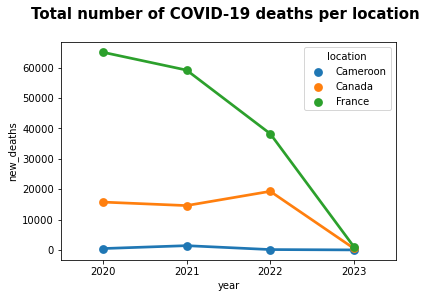

In [32]:
dt_country=dt[dt["location"].isin(["France","Canada","Cameroon"])]

plt.subplot(111)
sns.pointplot(x='year', y='new_deaths', data = dt_country, hue= "location")

plt.title("Total number of COVID-19 deaths per location \n", fontsize=15, fontweight="bold")
plt.show()

##### <font color = black > 19.1) Per year, let us look at the Top 05 countires with the highest number of deaths and cases</font> <font color = black>**_2020/2021/2022/2023_**</font>

In [33]:
dt[dt["year"]== 2020].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)

year       location   new_cases  new_deaths
206  2020  United States  20217272.0    350555.0
91   2020          India  10286709.0    148995.0
27   2020         Brazil   7700828.0    195072.0
161  2020         Russia   3127347.0     56271.0
70   2020         France   2735590.0     65031.0

In [34]:
dt[dt["year"]== 2021].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)

year        location   new_cases  new_deaths
440  2021   United States  34687377.0    475059.0
312  2021           India  24574870.0    325118.0
246  2021          Brazil  14485929.0    424262.0
439  2021  United Kingdom  10456330.0     82391.0
290  2021          France   7706191.0     59161.0

In [35]:
dt[dt["year"]== 2022].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)

year       location   new_cases  new_deaths
673  2022  United States  45856313.0    267871.0
529  2022        Germany  30260684.0     49863.0
524  2022         France  29345799.0     38226.0
646  2022    South Korea  28481547.0     26594.0
555  2022          Japan  27501370.0     38892.0

In [36]:
# let us concatenate the previous dataframes in order to have all the years in a bar chart 

dt_2020 = dt[dt["year"]== 2020].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)
dt_2021 = dt[dt["year"]== 2021].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)
dt_2022 = dt[dt["year"]== 2022].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)

dt_group=dt_2020.append([dt_2021,dt_2022])

C:\Users\pc\AppData\Local\Temp\ipykernel_2404\1246131657.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt_group=dt_2020.append([dt_2021,dt_2022])


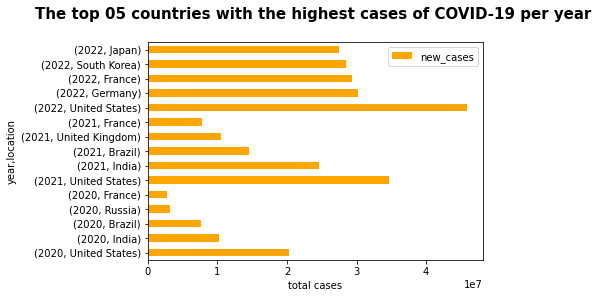

In [37]:
dt_group.set_index(["year","location"]).plot(kind='barh', y=["new_cases"], color = 'orange', legend = "Total_cases")
plt.title ("The top 05 countries with the highest cases of COVID-19 per year \n", fontsize=15, fontweight="bold")
plt.xlabel("total cases")
plt.show()

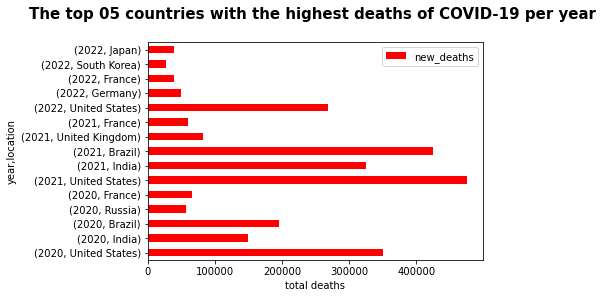

In [38]:
dt_group.set_index(["year","location"]).plot(kind='barh', y=["new_deaths"], color = 'red')
plt.title ("The top 05 countries with the highest deaths of COVID-19 per year \n",fontsize=15, fontweight="bold")
plt.xlabel("total deaths")
plt.show()

In [39]:
dt[dt["year"]== 2023].sort_values(["new_cases","new_deaths"], na_position = "last", ascending = False).head(5)
# our data ends on the 09/01/2023 so this results does not take into consideration the 12 months of the given year

year       location  new_cases  new_deaths
787  2023          Japan  1356342.0      2892.0
898  2023  United States   524384.0      3774.0
873  2023    South Korea   482947.0       450.0
882  2023         Taiwan   225145.0       329.0
763  2023        Germany   170206.0      1510.0

#### <font color = black> 20) Mortality rate </font>
> **_Total deaths / population_**

<font color = black>**20.1) Annual mortality rate** (per 1000 people)</font>

In [40]:
df= data.copy()
df = df.groupby(["year","iso_code","location","population"]).sum().loc[:,["new_deaths"]].reset_index()
len(df.columns) #4
df.insert(5, "Annual mortality rate (per 1000)", (df["new_deaths"]/df["population"])*1000)
df.head(2)

year iso_code     location  population  new_deaths  \
0  2020      ABW        Aruba    106459.0        50.0   
1  2020      AFG  Afghanistan  41128772.0      2189.0   

   Annual mortality rate (per 1000)  
0                          0.469664  
1                          0.053223

<font color = black>**20.2 Let us choose some countries to visualise their annual mortality rate_** (per 1000 people)</font>

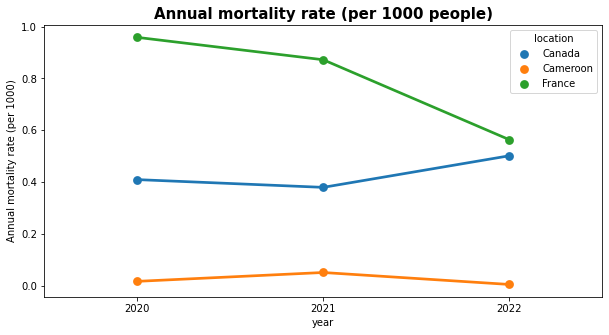

In [41]:
df_country= df[(df["location"].isin(["France", "Canada", "Cameroon"])) & (df["year"].isin([2020,2021,2022]))]

plt.figure(figsize=(10,5))
sns.pointplot(x="year", y="Annual mortality rate (per 1000)", data = df_country, hue = "location")
plt.title("Annual mortality rate (per 1000 people)",fontsize=15, fontweight="bold")
plt.show()

<font color = black>**20.3 The top 05 countries with the highest annual mortality rate** (per 1000 population)</font> <font color = black>**_2020/2021/2022_**</font>

In [42]:
df[df["year"]==2020].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5)

year iso_code        location  population  new_deaths  \
155  2020      PER            Peru  34049588.0     93070.0   
177  2020      SMR      San Marino     33690.0        59.0   
14   2020      BEL         Belgium  11655923.0     19645.0   
68   2020      GBR  United Kingdom  67508936.0     94998.0   
185  2020      SVN        Slovenia   2119843.0      2697.0   

     Annual mortality rate (per 1000)  
155                          2.733366  
177                          1.751262  
14                           1.685409  
68                           1.407191  
185                          1.272264

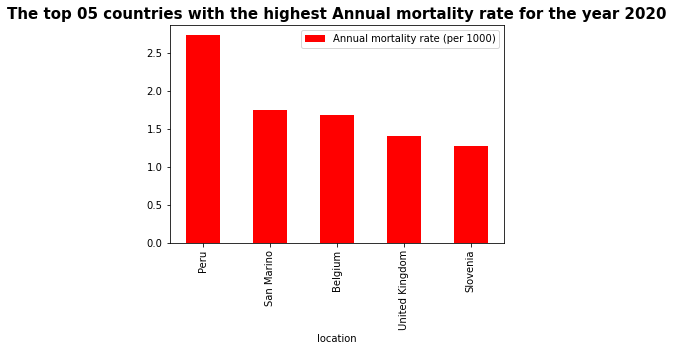

In [43]:
df[df["year"]==2020].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5).set_index("location").plot(kind = "bar", y= ["Annual mortality rate (per 1000)"], color = 'red')
plt.title("The top 05 countries with the highest Annual mortality rate for the year 2020",fontsize=15, fontweight="bold")
plt.show()

In [44]:
df[df["year"]==2021].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5)

year iso_code                location  population  new_deaths  \
238  2021      BGR                Bulgaria   6781955.0     23379.0   
383  2021      PER                    Peru  34049588.0    110329.0   
290  2021      GEO                 Georgia   3744385.0     11295.0   
308  2021      HUN                 Hungary   9967304.0     29649.0   
241  2021      BIH  Bosnia and Herzegovina   3233530.0      9403.0   

     Annual mortality rate (per 1000)  
238                          3.447236  
383                          3.240245  
290                          3.016517  
308                          2.974626  
241                          2.907967

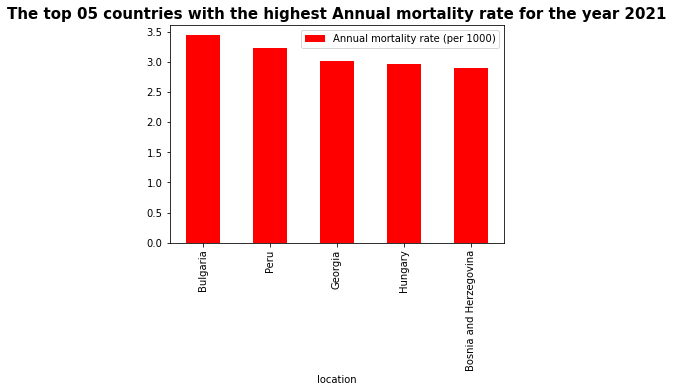

In [45]:
df[df["year"]==2021].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5).set_index("location").plot(kind = "bar", y= ["Annual mortality rate (per 1000)"], color = 'red')
plt.title("The top 05 countries with the highest Annual mortality rate for the year 2021",fontsize=15, fontweight="bold")
plt.show()

In [46]:
df[df["year"]==2022].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5)

year iso_code    location  population  new_deaths  \
592  2022      MSR  Montserrat      4413.0         8.0   
539  2022      HKG   Hong Kong   7488863.0     11594.0   
453  2022      ABW       Aruba    106459.0       158.0   
533  2022      GRC      Greece  10384972.0     13989.0   
541  2022      HRV     Croatia   4030361.0      5058.0   

     Annual mortality rate (per 1000)  
592                          1.812826  
539                          1.548166  
453                          1.484139  
533                          1.347043  
541                          1.254974

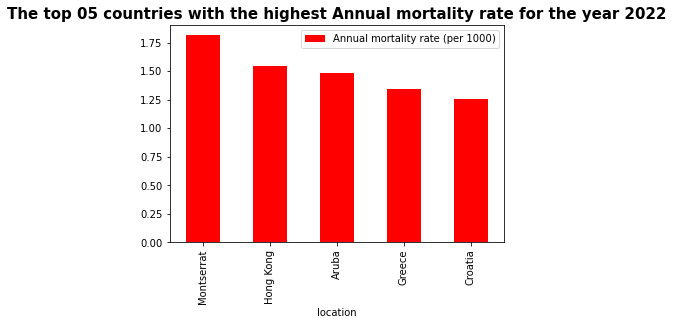

In [47]:
df[df["year"]==2022].sort_values("Annual mortality rate (per 1000)", ascending =False, na_position="last", axis = 0).head(5).set_index("location").plot(kind = "bar", y= ["Annual mortality rate (per 1000)"], color = 'red')
plt.title("The top 05 countries with the highest Annual mortality rate for the year 2022",fontsize=15, fontweight="bold")
plt.show()

#### <font color = black> 21) Infection rate </font>
> **_total_cases / population_**

<font color = black>**21.1) Monthly infection rate**</font>

In [48]:
df= data.copy()
df.head(2)

iso_code continent     location  month  year       date  total_cases  \
0      AFG      Asia  Afghanistan      2  2020 2020-02-24          5.0   
1      AFG      Asia  Afghanistan      2  2020 2020-02-25          5.0   

   new_cases  total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0        5.0           NaN         NaN                 NaN                NaN   
1        0.0           NaN         NaN                 NaN                NaN   

   people_fully_vaccinated  population  
0                      NaN  41128772.0  
1                      NaN  41128772.0

In [49]:
df = df.groupby(["year","month","location","population"]).sum().loc[:,["new_cases"]].reset_index()
df.insert(5,"Monthly infection rate",(df["new_cases"]/ df["population"])*100)

In [50]:
df.head(3)

year  month   location  population  new_cases  Monthly infection rate
0  2020      1  Argentina  45510324.0        0.0                0.000000
1  2020      1  Australia  26177410.0        9.0                0.000034
2  2020      1   Cambodia  16767851.0        1.0                0.000006

<font color = black>**21.2) Monthly infection rate in France, Canada, Cameroon**</font>
> Let us create a date column to visualise the monthly infection throughout the years

In [51]:
df["day"]= 25  # we just create a day column inorder to combine it later with month and year column
df["date"] = (df["year"].astype(str) + "/" + df["month"].astype(str) + "/" + df["day"].astype(str))

In [52]:
df["date"]= pd.to_datetime(df["date"]).dt.date

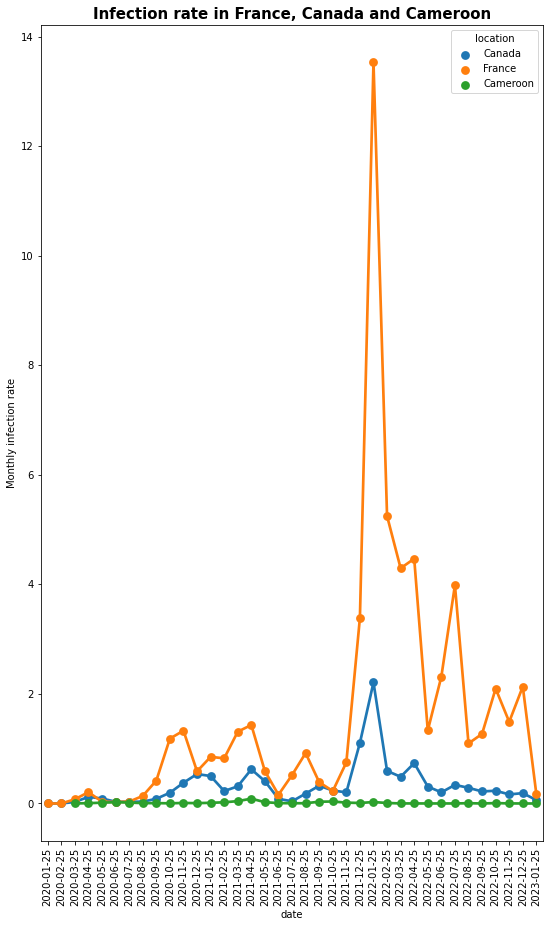

In [53]:
df_country = df[df["location"].isin(["France","Canada","Cameroon"])]
pd.to_datetime(df["date"]).dt.date

plt.figure(figsize=(9,15))
sns.pointplot(x="date", y="Monthly infection rate", data = df_country , hue = "location")

plt.title("Infection rate in France, Canada and Cameroon",fontsize=15, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

<font color = black>**21.3 Top 05 countries with the highest infection rate for the years**</font> <font color = black>**_2020/2021/2022_**</font>

In [54]:
df[df["year"]==2020].nlargest(5, columns = ["Monthly infection rate"], keep = "all")

year  month    location  population  new_cases  Monthly infection rate  \
1590  2020     10     Andorra     79843.0     2706.0                3.389151   
2100  2020     12   Gibraltar     32677.0     1020.0                3.121462   
2137  2020     12   Lithuania   2750058.0    82554.0                3.001900   
2201  2020     12    Slovakia   5643455.0   153256.0                2.715641   
1919  2020     11  Luxembourg    647601.0    17544.0                2.709075   

      day        date  
1590   25  2020-10-25  
2100   25  2020-12-25  
2137   25  2020-12-25  
2201   25  2020-12-25  
1919   25  2020-11-25

In [55]:
df[df["year"]==2021].nlargest(5, columns = ["Monthly infection rate"], keep = "all")

year  month                location  population  new_cases  \
4773  2021     12                 Andorra     79843.0     6625.0   
4573  2021     11          Cayman Islands     68722.0     5424.0   
3629  2021      7  British Virgin Islands     31332.0     2202.0   
3262  2021      5                Maldives    523798.0    34561.0   
3906  2021      8        French Polynesia    306292.0    20130.0   

      Monthly infection rate  day        date  
4773                8.297534   25  2021-12-25  
4573                7.892669   25  2021-11-25  
3629                7.027959   25  2021-07-25  
3262                6.598154   25  2021-05-25  
3906                6.572160   25  2021-08-25

In [56]:
df[df["year"]==2022].nlargest(5, columns = ["Monthly infection rate"], keep = "all")

year  month          location  population  new_cases  \
6004  2022      5  Falkland Islands      3801.0     1510.0   
6758  2022      8  Marshall Islands     41593.0    14978.0   
7031  2022      9      Saint Helena      5401.0     1514.0   
5304  2022      2    Faeroe Islands     53117.0    14612.0   
6310  2022      6             Nauru     12691.0     3391.0   

      Monthly infection rate  day        date  
6004               39.726388   25  2022-05-25  
6758               36.010867   25  2022-08-25  
7031               28.031846   25  2022-09-25  
5304               27.509084   25  2022-02-25  
6310               26.719723   25  2022-06-25

<Figure size 432x432 with 0 Axes>

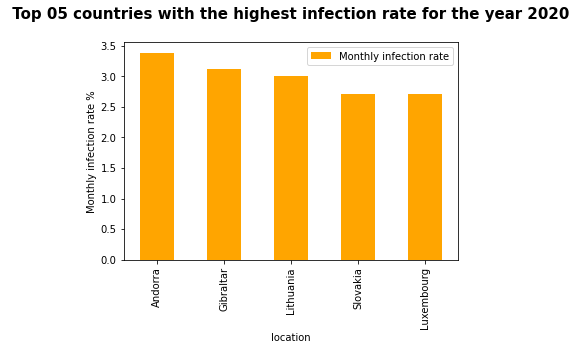

<Figure size 432x432 with 0 Axes>

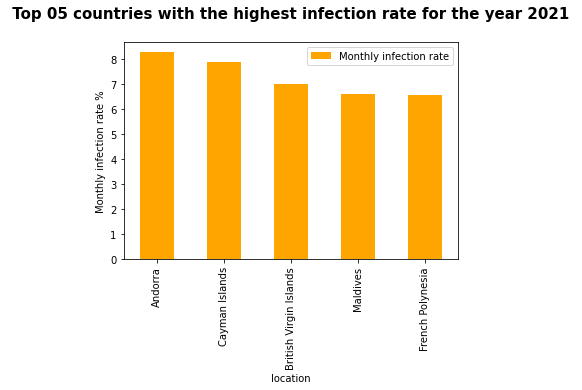

<Figure size 432x432 with 0 Axes>

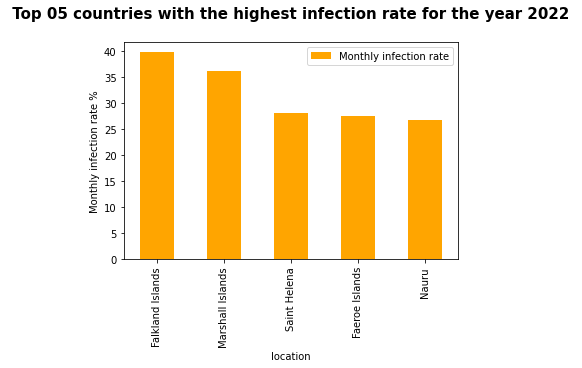

In [57]:
df_2020 = df[df["year"]==2020].nlargest(5, columns = ["Monthly infection rate"], keep = "all")
df_2021= df[df["year"]==2021].nlargest(5, columns = ["Monthly infection rate"], keep = "all")
df_2022= df[df["year"]==2022].nlargest(5, columns = ["Monthly infection rate"], keep = "all")

plt.figure(figsize=(6,6))
df_2020.set_index("location").plot(kind = 'bar', y=["Monthly infection rate"], color = "orange")
plt.ylabel("Monthly infection rate %")
plt.title(" Top 05 countries with the highest infection rate for the year 2020 \n",fontsize=15, fontweight="bold")

plt.figure(figsize=(6,6))
df_2021.set_index("location").plot(kind = 'bar', y=["Monthly infection rate"], color = "orange" )
plt.ylabel("Monthly infection rate %")
plt.title(" Top 05 countries with the highest infection rate for the year 2021 \n",fontsize=15, fontweight="bold")


plt.figure(figsize=(6,6))
df_2022.set_index("location").plot(kind = 'bar', y=["Monthly infection rate"], color = "orange" )
plt.ylabel("Monthly infection rate %")
plt.title(" Top 05 countries with the highest infection rate for the year 2022 \n",fontsize=15, fontweight="bold")

plt.show()

#### <font color = black> 22) Average monthly infection and mortality</font>


> I will do the **_sum of new_cases_** (infected) and **_new_deaths_** per **_month_** for a given **_year_**, **_month_** and **_location_** using **_pivot tables_**  
> I will later on do a **_groupby()_** by year and location to **_add up all the monthly cases and deaths_** per **_location_**
> Lastly i divide the **_total_cases_** and **_total_deaths_** by **_12 months_** to have the **_average monthly cases and deaths of COVID-19_**

In [58]:
df = pd.pivot_table(data, values=['new_cases', 'new_deaths','date'], index=['year','month','location','iso_code'],
                    aggfunc={'new_cases': np.sum,
                             'new_deaths': np.sum,
                              'date': 'count'})
df = df.reset_index()

In [59]:
df.head(3)

year  month   location iso_code  date  new_cases  new_deaths
0  2020      1  Argentina      ARG    31        0.0         0.0
1  2020      1  Australia      AUS     6        9.0         0.0
2  2020      1   Cambodia      KHM     5        1.0         0.0

In [60]:
df = df.groupby(["year","location",'iso_code']).sum().loc[:,["new_cases","new_deaths"]].reset_index()

In [61]:
df.insert(5, "Monthly average cases", df["new_cases"]/12)
df.insert(6, "Monthly average deaths", df["new_deaths"]/12)

##### <font color = black >**22.1) Let us remove the records that contain the year 2023**<font/>  
> The year 2023 just has records for January, not for all the months of the year.It isn't interesting to keep it

In [62]:
df = df[~(df["year"]==2023)]

#####   <font color = black >**22.2 Let us look at France, Canada and Cameroon** </font >

In [63]:
df[df["location"]== "France"]

year location iso_code   new_cases  new_deaths  Monthly average cases  \
70   2020   France      FRA   2735590.0     65031.0           2.279658e+05   
290  2021   France      FRA   7706191.0     59161.0           6.421826e+05   
524  2022   France      FRA  29345799.0     38226.0           2.445483e+06   

     Monthly average deaths  
70              5419.250000  
290             4930.083333  
524             3185.500000

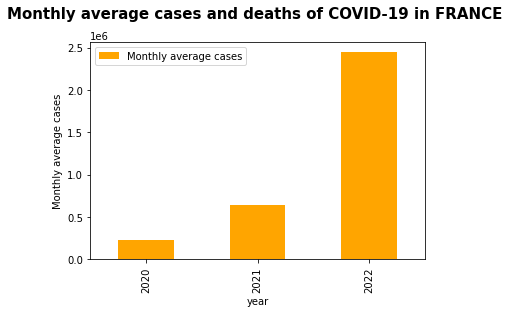

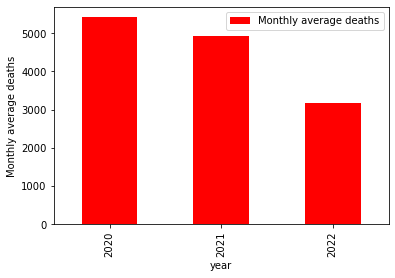

In [64]:
df[df["location"]== "France"].set_index("year").plot(kind = "bar", y =["Monthly average cases"], color = 'orange')
plt.ylabel("Monthly average cases")

plt.title("Monthly average cases and deaths of COVID-19 in FRANCE \n",fontsize=15, fontweight="bold")

df[df["location"]== "France"].set_index("year").plot(kind = "bar", y =["Monthly average deaths"], color = 'red')
plt.ylabel("Monthly average deaths")

plt.show()

In [65]:
df[df["location"]== "Canada"]

year location iso_code  new_cases  new_deaths  Monthly average cases  \
35   2020   Canada      CAN   590249.0     15737.0           49187.416667   
254  2021   Canada      CAN  1633486.0     14585.0          136123.833333   
488  2022   Canada      CAN  2297368.0     19276.0          191447.333333   

     Monthly average deaths  
35              1311.416667  
254             1215.416667  
488             1606.333333

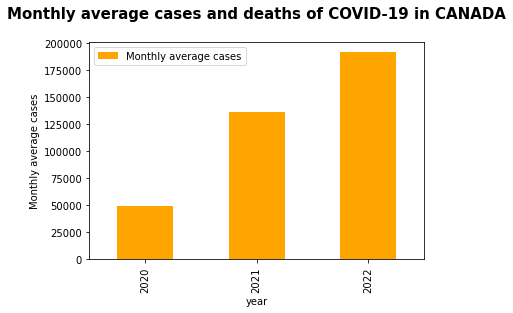

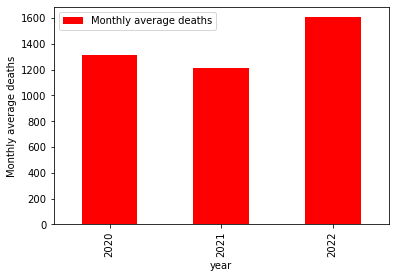

In [66]:
df[df["location"]== "Canada"].set_index("year").plot(kind = "bar", y =["Monthly average cases"], color = 'orange')
plt.ylabel("Monthly average cases")

plt.title("Monthly average cases and deaths of COVID-19 in CANADA\n",fontsize=15, fontweight="bold")

df[df["location"]== "Canada"].set_index("year").plot(kind = "bar", y =["Monthly average deaths"], color = 'red')
plt.ylabel("Monthly average deaths")

plt.show()

In [67]:
df[df["location"]== "Cameroon"]

year  location iso_code  new_cases  new_deaths  Monthly average cases  \
34   2020  Cameroon      CMR    26277.0       448.0            2189.750000   
253  2021  Cameroon      CMR    83090.0      1403.0            6924.166667   
487  2022  Cameroon      CMR    14626.0       114.0            1218.833333   

     Monthly average deaths  
34                37.333333  
253              116.916667  
487                9.500000

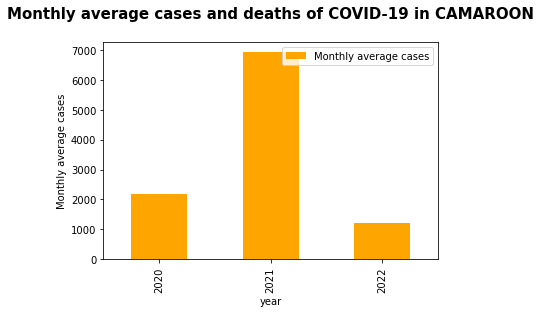

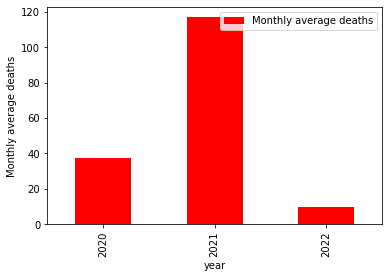

In [68]:
df[df["location"]== "Cameroon"].set_index("year").plot(kind = "bar", y =["Monthly average cases"], color = 'orange')
plt.ylabel("Monthly average cases")

plt.title("Monthly average cases and deaths of COVID-19 in CAMAROON\n",fontsize=15, fontweight="bold")

df[df["location"]== "Cameroon"].set_index("year").plot(kind = "bar", y =["Monthly average deaths"], color = 'red')
plt.ylabel("Monthly average deaths")

plt.show()

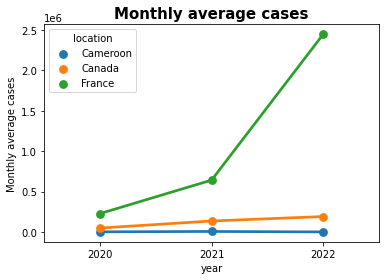

In [69]:
df_loc=df[df["location"].isin(["Cameroon","France","Canada"])]

sns.pointplot(x="year",y = "Monthly average cases", data = df_loc, hue = "location")
plt.title("Monthly average cases",fontsize=15, fontweight="bold")
plt.show()

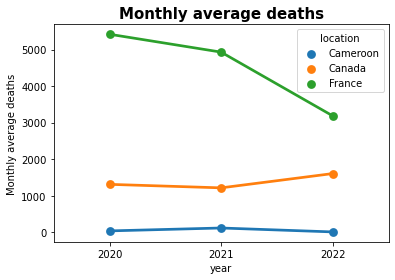

In [70]:
sns.pointplot(x="year",y = "Monthly average deaths", data = df_loc, hue = "location")
plt.title("Monthly average deaths",fontsize=15, fontweight="bold")
plt.show()

#### <font color = black> 23) Vaccinations</font>
> (people vaccinated / population)* 100%.  
> Let us keep in mind that the columns **_"people_vaccinated"_** and **_"people fully vaccinated"_** are **_cumulative columns_**.


In [71]:
data.head(2)

iso_code continent     location  month  year       date  total_cases  \
0      AFG      Asia  Afghanistan      2  2020 2020-02-24          5.0   
1      AFG      Asia  Afghanistan      2  2020 2020-02-25          5.0   

   new_cases  total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0        5.0           NaN         NaN                 NaN                NaN   
1        0.0           NaN         NaN                 NaN                NaN   

   people_fully_vaccinated  population  
0                      NaN  41128772.0  
1                      NaN  41128772.0

> When going through the data we realise that we have missing values for some months of some locations  
> The columns we are interested in are cumulative columns,for each location we will extract the max number of people vaccinated and people fully vaccinated before applying an operation

##### <font color = black> **23.1) For each location let us look at the cumulative trend in vaccinations throughout the years**</font>


In [72]:
df=data.groupby(["year","month","location",'iso_code',"population"]).max().loc[:,["people_vaccinated","people_fully_vaccinated","date"]].reset_index()

In [73]:
df.insert(7,"Pct population vaccinated", (df["people_vaccinated"]/df["population"])*100)
df.insert(8,"Pct population fully vaccinated", (df["people_fully_vaccinated"]/df["population"])*100)

##### <font color = black>23.2) **_Convert the datetime column to date_**<font/>

In [74]:
df['date'] = pd.to_datetime(df['date']).dt.date

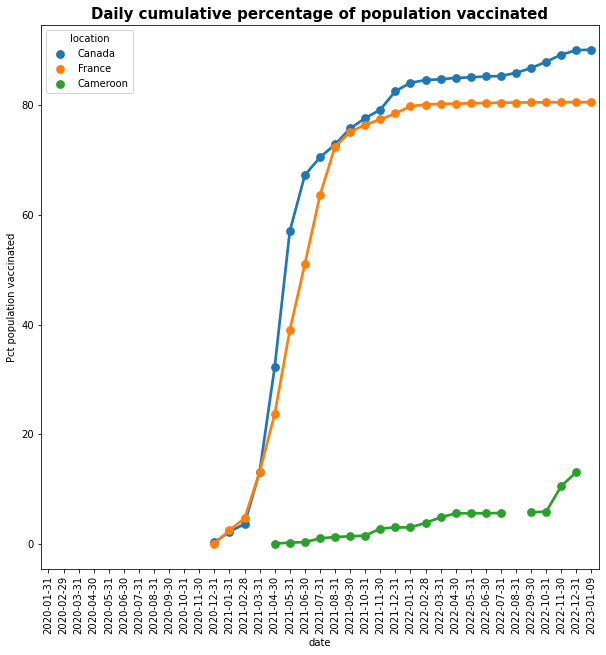

In [75]:
df_loc= df[df["location"].isin(["France","Canada","Cameroon"])]

plt.figure(figsize=(10,10))
sns.pointplot(x="date",y = "Pct population vaccinated", data = df_loc, hue = "location")
plt.title("Daily cumulative percentage of population vaccinated",fontsize=15, fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

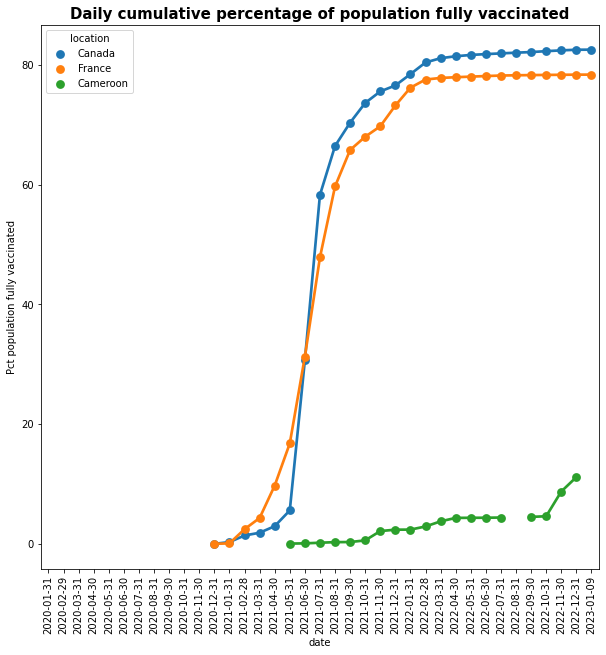

In [76]:
df_loc= df[df["location"].isin(["France","Canada","Cameroon"])]

plt.figure(figsize=(10,10))
sns.pointplot(x="date",y = "Pct population fully vaccinated", data = df_loc, hue = "location")
plt.title("Daily cumulative percentage of population fully vaccinated",fontsize=15, fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

##### <font color=black> 23.3) **Choropleth map**<font />

> Let us keep in mind that the columns **_"people_vaccinated_**" and **_"people fully vaccinated"_** are **_cumulative columns_**

In [87]:
df=data.groupby(["year","location",'iso_code',"population"]).max().loc[:,["people_vaccinated","people_fully_vaccinated"]].reset_index()

In [88]:
df[df["year"]==2022].sort_values( "people_vaccinated", axis = 0,na_position= "first", ascending = False ).head(2)
# some countries do not have records for some years

year                         location iso_code  population  \
477  2022  Bonaire Sint Eustatius and Saba      BES     27052.0   
516  2022                          Eritrea      ERI   3684041.0   

     people_vaccinated  people_fully_vaccinated  
477                NaN                      NaN  
516                NaN                      NaN

In [89]:
# people vaccinated should be less than or equal to the population, let us verify
df[df["people_vaccinated"]>df["population"]]
# !!!! we will delete these records

year              location iso_code  population  people_vaccinated  \
297  2021             Gibraltar      GIB     32677.0            41173.0   
438  2021  United Arab Emirates      ARE   9441138.0          9881456.0   
482  2022                Brunei      BRN    449002.0           450404.0   
531  2022             Gibraltar      GIB     32677.0            42175.0   
621  2022                 Qatar      QAT   2695131.0          2850159.0   
661  2022               Tokelau      TKL      1893.0             2203.0   
671  2022  United Arab Emirates      ARE   9441138.0          9991089.0   

     people_fully_vaccinated  
297                  40065.0  
438                9059559.0  
482                 445929.0  
531                  41465.0  
621                2850158.0  
661                   2203.0  
671                9792266.0

In [90]:
df[(df["people_fully_vaccinated"]>df["population"])]
# !!! we will delete these records

year              location iso_code  population  people_vaccinated  \
297  2021             Gibraltar      GIB     32677.0            41173.0   
531  2022             Gibraltar      GIB     32677.0            42175.0   
621  2022                 Qatar      QAT   2695131.0          2850159.0   
661  2022               Tokelau      TKL      1893.0             2203.0   
671  2022  United Arab Emirates      ARE   9441138.0          9991089.0   

     people_fully_vaccinated  
297                  40065.0  
531                  41465.0  
621                2850158.0  
661                   2203.0  
671                9792266.0

In [91]:
df= df[~((df["people_fully_vaccinated"]>df["population"]) | (df["people_vaccinated"]>df["population"]))]

In [92]:
df.insert(6,"Pct population vaccinated", (df["people_vaccinated"]/df["population"])*100)
df.insert(7,"Pct population fully vaccinated", (df["people_fully_vaccinated"]/df["population"])*100)

In [93]:
df[df["Pct population vaccinated"]>100]  # we have no records we are good

Empty DataFrame
Columns: [year, location, iso_code, population, people_vaccinated, people_fully_vaccinated, Pct population vaccinated, Pct population fully vaccinated]
Index: []

In [94]:
df[df["Pct population fully vaccinated"]>100]  # we have no records we are good

Empty DataFrame
Columns: [year, location, iso_code, population, people_vaccinated, people_fully_vaccinated, Pct population vaccinated, Pct population fully vaccinated]
Index: []

In [95]:
# for each location let us select the highest Pct population vaccinated... since we are working with cumulative columns 
df = df.groupby(["iso_code","location"]).max().loc[:,["Pct population vaccinated","Pct population fully vaccinated"]].reset_index()

In [98]:
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
fig = px.choropleth(df,
                    locations="iso_code", # colunm containing ISO 3166 country codes
                    color="Pct population vaccinated", # column by which to color-code
                    hover_name="location", # column to display in hover information
                 color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    # add a title text for the plot
    title_text = 'Percentage of population vaccinated up to the 09/01/2023',
    #geo_scope = 'africa', # can be set to north america | south america | africa | asia | europe | usa
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

# <font color = black >Attached online document<font/>
> [Online resource for geospatial map](https://subscription.packtpub.com/book/data/9781800200944/6/ch06lvl1sec36/choropleth-maps "Online resource for geospatial map")  